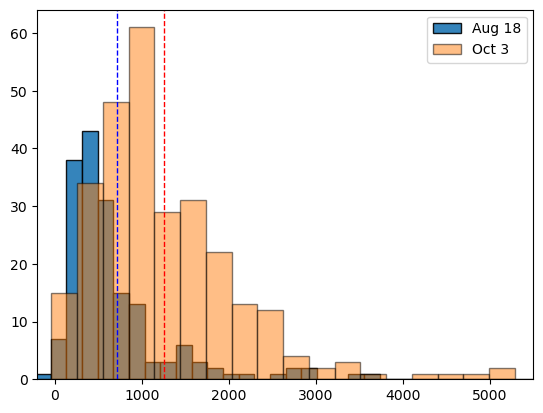

In [1]:
#Compare the data across runs, adjusting the means after shifting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

#read in august data
df = pd.read_csv('844-206v5_081723 CD4+CD127 counts.csv')
# Create a new DataFrame with repeated values based on counts
result_array = np.repeat(df['value'], df['count'])
result_df = pd.DataFrame({'value': np.repeat(df['value'], df['count'])})
# Convert the result to a NumPy array if needed
result_array = result_df['value'].to_numpy()
#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array, bins='auto')

#read in second dataset
df2 = pd.read_csv('844-206v5_100323 CD4+CD127 counts.csv')
# Create a new DataFrame with repeated values based on counts
result_array2 = np.repeat(df2['value'], df2['count'])
result_df2 = pd.DataFrame({'value': np.repeat(df2['value'], df2['count'])})
# Convert the result to a NumPy array if needed
result_array2 = result_df2['value'].to_numpy()
bin_size2 = np.histogram_bin_edges(result_array2, bins='auto')

# calculate means
mean_result_array = np.mean(result_array)
mean_result_array2 = np.mean(result_array2)

#plot data, exclude x-values >5500
#alpha value in plt.hist line indicates how bold the plotted bars are, alpha = 1 indicates no transparency
plt.hist(result_array, bins=bin_size1, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(result_array2, bins=bin_size2, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500)
plt.legend()

# add mean values to the plot
plt.axvline(x=mean_result_array, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=mean_result_array2, color='red', linestyle='dashed', linewidth=1)
plt.show()

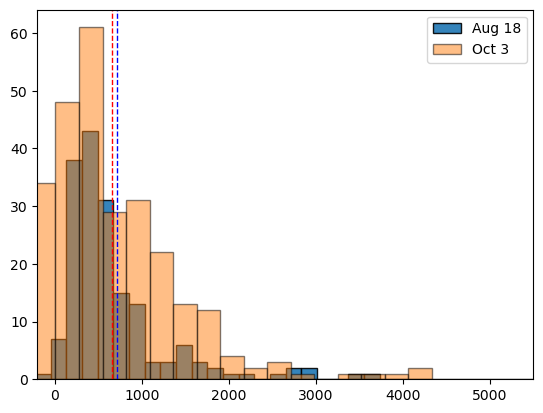

In [2]:
##To account for machine setting differences
#1. Calculate the difference in means: Subtract the mean of the collected dataset from the mean of the reference dataset.
# Mean difference = Mean (collected dataset) - Mean (reference dataset)
mean_diff = mean_result_array2 - mean_result_array

#2. Calculate the ratio of standard deviations: Divide the standard deviation of the collected dataset 
#by the standard deviation of the reference dataset.
# Standard deviation ratio = Standard deviation (collected dataset) / Standard deviation (reference dataset)
sd_1 = np.std(result_array)
sd_2 = np.std(result_array2)
sd_ratio = sd_2 / sd_1

#3. Apply the adjustments to your collected data:
# Subtract the mean difference from each data point in your collected dataset.
# Divide each adjusted data point by the standard deviation ratio.
adjusted_result_array2 = (result_array2 - mean_diff) / sd_ratio

#calculate new optimal bin size
bin_size3 = np.histogram_bin_edges(adjusted_result_array2, bins='auto')

# calculate means
mean_result_array = np.mean(result_array)
mean_adjusted_result_array2 = np.mean(adjusted_result_array2)

plt.hist(result_array, bins=bin_size1, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(adjusted_result_array2, bins=bin_size3, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500)
plt.legend()

# add mean values to the plot
plt.axvline(x=mean_result_array, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=mean_adjusted_result_array2, color='red', linestyle='dashed', linewidth=1)
plt.show()

In [3]:
#Since the data are skewed, need to use a distribution-free method
#Mann-Whitney Test (similar to a Wilcoxon rank sum test) Two (unpaired) samples
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(result_array, adjusted_result_array2)

# Output the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")

Mann-Whitney U statistic: 26306.0
P-value: 0.18578588018117814
Fail to reject the null hypothesis. There is no significant difference between the two groups.


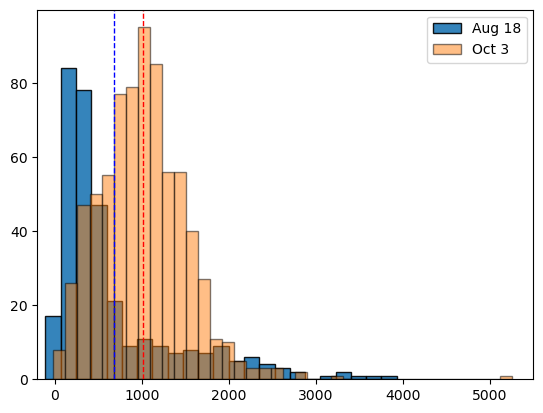

In [4]:
#test the next sample
#read in august data
df = pd.read_csv('844-220v1_081723 CD4+CD127 counts.csv')

result_array = np.repeat(df['value'], df['count'])
result_df = pd.DataFrame({'value': np.repeat(df['value'], df['count'])})
result_array = result_df['value'].to_numpy()
bin_size1 = np.histogram_bin_edges(result_array, bins='auto')

#read in second dataset
df2 = pd.read_csv('844-220v1_100323 CD4+CD127 counts.csv')
result_array2 = np.repeat(df2['value'], df2['count'])
result_df2 = pd.DataFrame({'value': np.repeat(df2['value'], df2['count'])})
result_array2 = result_df2['value'].to_numpy()
bin_size2 = np.histogram_bin_edges(result_array2, bins='auto')

# calculate means
mean_result_array = np.mean(result_array)
mean_result_array2 = np.mean(result_array2)

plt.hist(result_array, bins=bin_size1, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(result_array2, bins=bin_size2, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500)
plt.legend()
plt.axvline(x=mean_result_array, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=mean_result_array2, color='red', linestyle='dashed', linewidth=1)
plt.show()

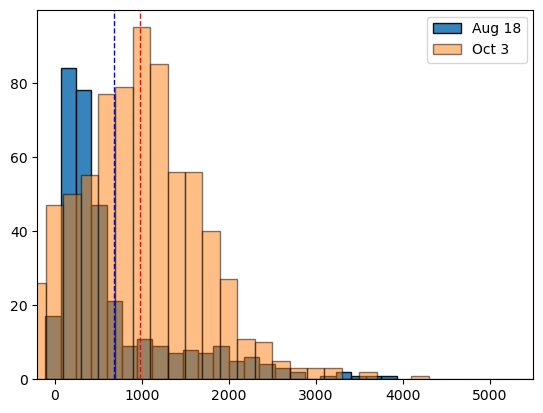

In [5]:
mean_diff = mean_result_array2 - mean_result_array
sd_1 = np.std(result_array)
sd_2 = np.std(result_array2)
sd_ratio = sd_2 / sd_1
adjusted_result_array2 = (result_array2 - mean_diff) / sd_ratio
bin_size3 = np.histogram_bin_edges(adjusted_result_array2, bins='auto')
mean_result_array = np.mean(result_array)
mean_adjusted_result_array2 = np.mean(adjusted_result_array2)

plt.hist(result_array, bins=bin_size1, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(adjusted_result_array2, bins=bin_size3, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500)
plt.legend()
plt.axvline(x=mean_result_array, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=mean_adjusted_result_array2, color='red', linestyle='dashed', linewidth=1)
plt.show()

In [6]:
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(result_array, adjusted_result_array2)

# Output the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")

Mann-Whitney U statistic: 84228.0
P-value: 1.0358497476776303e-16
Reject the null hypothesis. There is a significant difference between the two groups.


In [7]:
#still seems to be a decent difference between runs, try the last sample

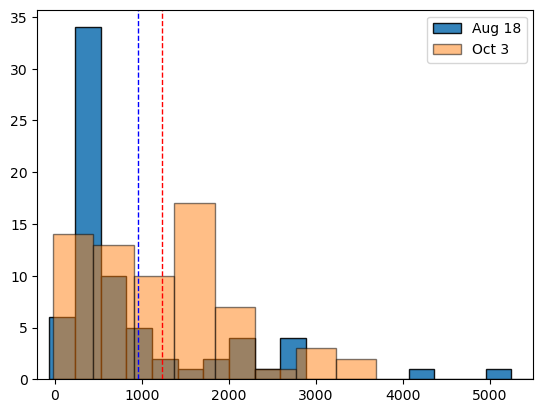

In [8]:
#test the next sample
#read in august data
df = pd.read_csv('844-224v1_081723 CD4+CD127 counts.csv')

result_array = np.repeat(df['value'], df['count'])
result_df = pd.DataFrame({'value': np.repeat(df['value'], df['count'])})
result_array = result_df['value'].to_numpy()
bin_size1 = np.histogram_bin_edges(result_array, bins='auto')

#read in second dataset
df2 = pd.read_csv('844-224v1_100323 CD4+CD127 counts.csv')
result_array2 = np.repeat(df2['value'], df2['count'])
result_df2 = pd.DataFrame({'value': np.repeat(df2['value'], df2['count'])})
result_array2 = result_df2['value'].to_numpy()
bin_size2 = np.histogram_bin_edges(result_array2, bins='auto')

# calculate means
mean_result_array = np.mean(result_array)
mean_result_array2 = np.mean(result_array2)

plt.hist(result_array, bins=bin_size1, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(result_array2, bins=bin_size2, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500)
plt.legend()
plt.axvline(x=mean_result_array, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=mean_result_array2, color='red', linestyle='dashed', linewidth=1)
plt.show()

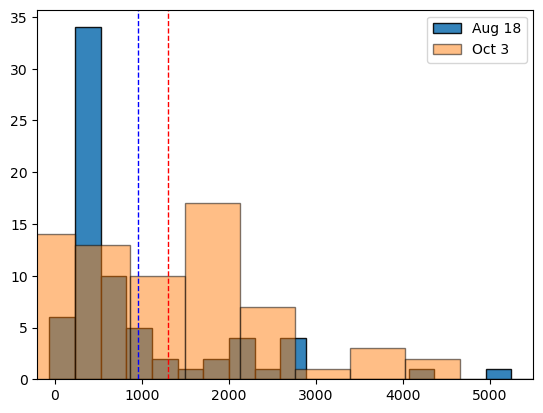

In [9]:
mean_diff = mean_result_array2 - mean_result_array
sd_1 = np.std(result_array)
sd_2 = np.std(result_array2)
sd_ratio = sd_2 / sd_1
adjusted_result_array2 = (result_array2 - mean_diff) / sd_ratio
bin_size3 = np.histogram_bin_edges(adjusted_result_array2, bins='auto')
mean_result_array = np.mean(result_array)
mean_adjusted_result_array2 = np.mean(adjusted_result_array2)

plt.hist(result_array, bins=bin_size1, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(adjusted_result_array2, bins=bin_size3, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500)
plt.legend()
plt.axvline(x=mean_result_array, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=mean_adjusted_result_array2, color='red', linestyle='dashed', linewidth=1)
plt.show()

In [10]:
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(result_array, adjusted_result_array2)

# Output the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")

Mann-Whitney U statistic: 1951.0
P-value: 0.052241508437480474
Fail to reject the null hypothesis. There is no significant difference between the two groups.
